# Regresión lineal

En esta parte del ejercicio, implementarás regresión lineal con una variable para predecir las ganancias de un camión de comida. Supón que eres el CEO de una franquicia de restaurantes y estás considerando diferentes ciudades para abrir una nueva sucursal. La cadena ya tiene camiones en varias ciudades y cuentas con datos de ganancias y poblaciones de esas ciudades.

El archivo `ex1data1.txt` contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna es la población de una ciudad y la segunda columna es la ganancia de un camión de comida en esa ciudad. Un valor negativo en las ganancias indica una pérdida.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data1.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
# Crear los vectores X e y
X = data[:, 0]  # Población
y = data[:, 1]  # Ganancia

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


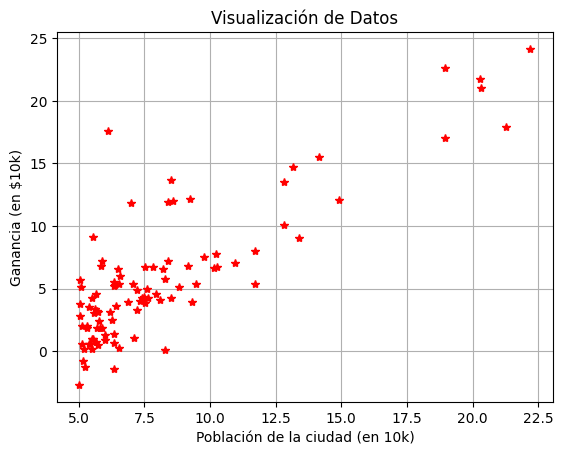

In [16]:
# ==================== Parte 1: Graficar los datos ====================

# Graficar los datos
plt.plot(X, y, '*r', label='Profit')  # Marcas en forma de estrella roja para los puntos
plt.grid(True)  # Activar la cuadrícula
#plt.legend()  # Puedes activar esto si deseas mostrar la leyenda
plt.xlabel('Población de la ciudad (en 10k)')
plt.ylabel('Ganancia (en $10k)')
plt.title('Visualización de Datos')
plt.show()

# Función de Costo

El objetivo de la **regresión lineal** es minimizar la siguiente función de costo:

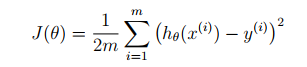

donde la hipótesis h está dada por:

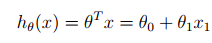

**Cree una matriz sumando una columna de unos al vector X.**

El costo esperado es de aproximadamente 32,07.

In [17]:
import numpy as np
from scipy.optimize import minimize

# Simulamos que los datos ya están cargados en la variable `data`
# Asegúrate de que el archivo esté cargado y esto se ejecute después de eso:
# Por ejemplo: data = np.loadtxt('ex1data1.txt', delimiter=',')

# Separar X y y
y = data[:, [1]]             # Vector de salida (m x 1)
X = data[:, [0]]             # Vector de entrada (m x 1)

# Agregar columna de unos a X para el término θ0
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Ahora X es (m x 2)

# Función de costo de regresión lineal
def cost_function(theta, X, y):
    m = len(y)  # número de ejemplos
    theta = theta.reshape(-1, 1)  # Asegurar que theta sea columna (2 x 1)
    
    predictions = X @ theta       # h = X * theta
    errors = predictions - y      # errores (h - y)
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # función de costo J(θ)
    
    return J

# Inicializar theta como vector de ceros (2 x 1)
theta = np.zeros((2, 1))

# Mostrar los parámetros y el costo
print(f"Parámetros del modelo (theta):\n{theta}")
print(f"Función de costo inicial: {cost_function(theta, X, y):.2f}")  # Debería dar aproximadamente 32.07


Parámetros del modelo (theta):
[[0.]
 [0.]]
Función de costo inicial: 32.07


# Descenso de gradiente

A continuación, implementarás el descenso de gradiente en el archivo gradientDescent.m.
La estructura del bucle ya ha sido escrita para ti, y solo necesitas proporcionar
las actualizaciones de θ dentro de cada iteración.

Usando los siguientes valores:
iteraciones = 3
theta = np.zeros((2, 1))
alpha = 0.01

Las primeras tres iteraciones:

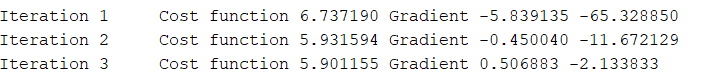

Iteración 1	Costo: 6.737190
Iteración 2	Costo: 5.931594
Iteración 3	Costo: 5.901155
Theta encontrado por el descenso de gradiente:  [0.05782293 0.79134812]
Para población = 35,000, predecimos un beneficio de 28275.41
Para población = 70,000, predecimos un beneficio de 55972.60


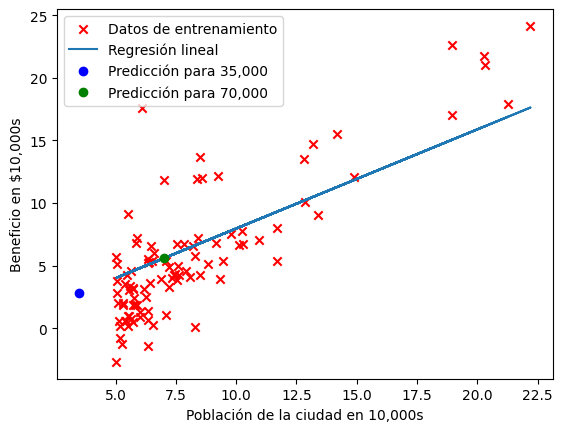

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Inicialización de variables
iterations = 3  # Número de iteraciones para el descenso de gradiente
m = data.shape[0]  # Número de ejemplos de entrenamiento
y = data[:, [1]]  # Etiquetas (beneficios)
X = data[:, [0]]  # Características (población)
X = np.hstack([np.ones((m, 1)), X])  # Agregar columna de unos para el término de sesgo
theta = np.zeros((2, 1))  # Inicializar los parámetros (theta) en cero
alpha = 0.01  # Tasa de aprendizaje

# Función de cálculo del costo (costo cuadrático medio)
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta  # Predicciones (X * theta)
    error = predictions - y  # Error (predicciones - valores reales)
    cost = (1 / (2 * m)) * np.sum(np.square(error))  # Costo (error cuadrático medio)
    return cost

# Función para calcular el descenso de gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)  # Número de ejemplos de entrenamiento
    J_history = np.zeros(iterations)  # Arreglo para guardar el costo en cada iteración

    # Realizar el descenso de gradiente
    for iter in range(iterations):
        # Actualización de los parámetros (theta) con el gradiente
        predictions = X @ theta  # Predicciones
        error = predictions - y  # Error
        theta = theta - (alpha / m) * (X.T @ error)  # Actualización de theta
        
        # Guardar el costo J en cada iteración
        J_history[iter] = cost_function(theta, X, y)
        print(f"Iteración {iter + 1}\tCosto: {J_history[iter]:.6f}")  # Imprimir el costo

    return theta

# Llamar a la función de descenso de gradiente
theta = gradientDescent(X, y, theta, alpha, iterations)
print("Theta encontrado por el descenso de gradiente: ", theta.ravel())  # Mostrar el valor de theta

# Realizar predicciones para poblaciones de 35,000 y 70,000
predict1 = np.array([1, 3.5]) @ theta  # Predicción para población = 35,000
print(f'Para población = 35,000, predecimos un beneficio de {(predict1 * 10000).item():.2f}')

predict2 = np.array([1, 7.0]) @ theta  # Predicción para población = 70,000
print(f'Para población = 70,000, predecimos un beneficio de {(predict2 * 10000).item():.2f}')

# Graficar la línea de ajuste
plt.scatter(X[:, 1], y, color='red', marker='x', label='Datos de entrenamiento')  # Los datos de entrada
plt.plot(X[:, 1], X @ theta, label='Regresión lineal')  # Línea de regresión calculada
plt.xlabel('Población de la ciudad en 10,000s')  # Etiqueta del eje X
plt.ylabel('Beneficio en $10,000s')  # Etiqueta del eje Y
plt.plot(3.5, predict1.item(), 'ob', label='Predicción para 35,000')  # Predicción para población 35,000
plt.plot(7.0, predict2.item(), 'og', label='Predicción para 70,000')  # Predicción para población 70,000
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico


Visualizando J(θ₀, θ₁) ...


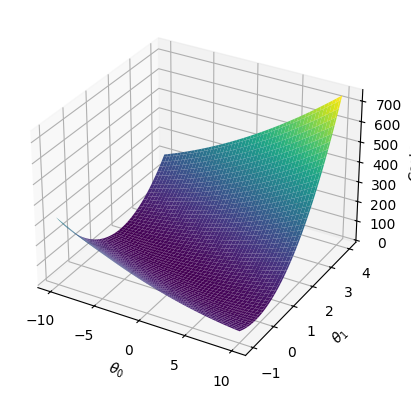

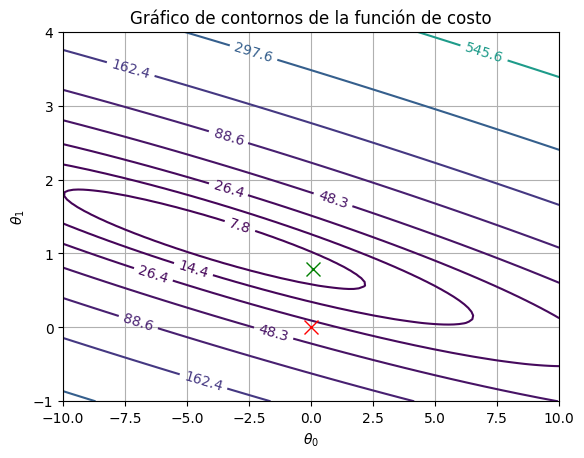

In [19]:
#VISUALIZACIÓN

from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

print('Visualizando J(θ₀, θ₁) ...')

theta_init = np.zeros((2, 1))  # Inicialización de los parámetros θ₀ y θ₁ en ceros
# Crear una malla sobre la cual calcularemos J
theta0_vals = np.linspace(-10, 10, 100)  # Valores de θ₀ desde -10 hasta 10
theta1_vals = np.linspace(-1, 4, 100)   # Valores de θ₁ desde -1 hasta 4

# Inicializamos J_vals como una matriz de ceros
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Rellenamos J_vals calculando el costo para cada combinación de θ₀ y θ₁
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])  # Combinación de θ₀ y θ₁
        J_vals[i, j] = cost_function(t, X, y)  # Calculamos el costo para esta combinación

# Transponemos J_vals para coincidir con la orientación de MATLAB
J_vals = J_vals.T

# Gráfico de superficie 3D
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')  # Superficie de la función de costo
ax.set_xlabel(r'$\theta_0$')  # Etiqueta del eje X (θ₀)
ax.set_ylabel(r'$\theta_1$')  # Etiqueta del eje Y (θ₁)
ax.set_zlabel('Costo')  # Etiqueta del eje Z (Costo)

# Gráfico de contornos
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))  # Contornos de la función de costo
plt.clabel(cp)  # Añadir etiquetas a los contornos
plt.xlabel(r'$\theta_0$')  # Etiqueta del eje X (θ₀)
plt.ylabel(r'$\theta_1$')  # Etiqueta del eje Y (θ₁)

# Marcar el valor inicial de θ en rojo y el valor final en verde
plt.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, linewidth=2)  # Marca en rojo el valor inicial de θ
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)  # Marca en verde el valor final de θ
plt.title('Gráfico de contornos de la función de costo')  # Título del gráfico
plt.grid(True)  # Activar la cuadrícula
plt.show()  # Mostrar el gráfico
